# FIFA Dataset Challenge: 1930 - 2014

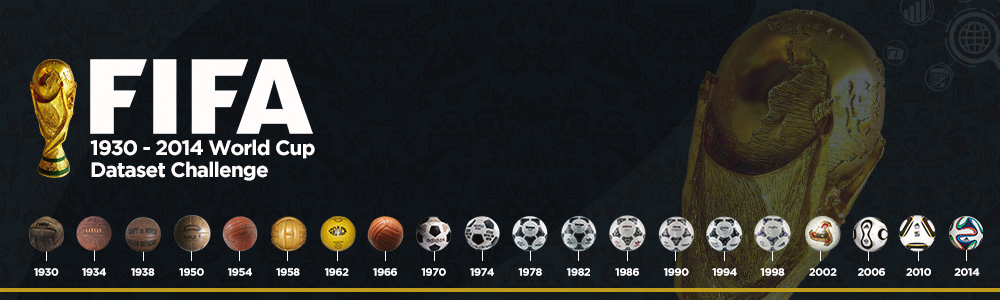

---
## 1. Import Dependencies
---

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
#pd.set_option("display.max_rows", None, "display.max_columns", None)

print('Pandas==', pd.__version__)
print('Matplotlib==', mpl.__version__)

Pandas== 0.24.1
Matplotlib== 3.0.2


---
## 2. Import Data and Clean Data
---

In [3]:
# The code was removed by Watson Studio for sharing.

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,


In [4]:
df = df.drop_duplicates(keep =False)
df.tail()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
815,2014,25-Jun-14,17:00,Group E,Estadio do Maracana,Rio De Janeiro,Ecuador,0,0,France,
816,2014,26-Jun-14,13:00,Group G,Arena Pernambuco,Recife,USA,0,1,Germany,
817,2014,26-Jun-14,13:00,Group G,Estadio Nacional,Brasilia,Portugal,2,1,Ghana,
818,2014,26-Jun-14,17:00,Group H,Arena de Sao Paulo,Sao Paulo,Korea Republic,0,1,Belgium,
819,2014,26-Jun-14,17:00,Group H,Arena da Baixada,Curitiba,Algeria,1,1,Russia,


In [5]:
df.describe()

,Year,HomeGoals,AwayGoals
count,820.000000,820.000000,820.000000
mean,1983.960976,1.837805,1.020732
std,22.129344,1.628286,1.055625
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1986.000000,2.000000,1.000000
75%,2002.000000,3.000000,2.000000
max,2014.000000,10.000000,7.000000


# Challenge Solutions

---
## How many matches were played each world cup year from 1930?
---

In [60]:
def barplot(x_axis, y_axis, x_data, y_data, annotate = 10, bar_width = 0.7):
    bar = pd.DataFrame(columns = [x_axis, y_axis])
    bar[x_axis] = x_data
    bar[y_axis] = y_data

    plot = bar.plot(kind='barh', x = x_axis, y = y_axis, figsize = (20, 15), width = bar_width, legend = False)

    plt.title(y_axis + '/' + x_axis + ' from 1930', fontsize = 20, pad = 30)
    plt.ylabel(x_axis, fontsize = 18)
    plt.xlabel(y_axis, fontsize = 18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

    
    for i in range(bar[y_axis].count()):
        plt.annotate(str(bar[y_axis].loc[i]) + ' ' + y_axis, xy = (annotate, i - 0.1), color = 'w', fontsize = 14)
    
    
    return plot

In [41]:
total_years = Counter(df['Year'])

#for k,v in total_years.items():
    #print('In', str(k) + ',', 'a total of', v, 'matches were played.', '\n------')

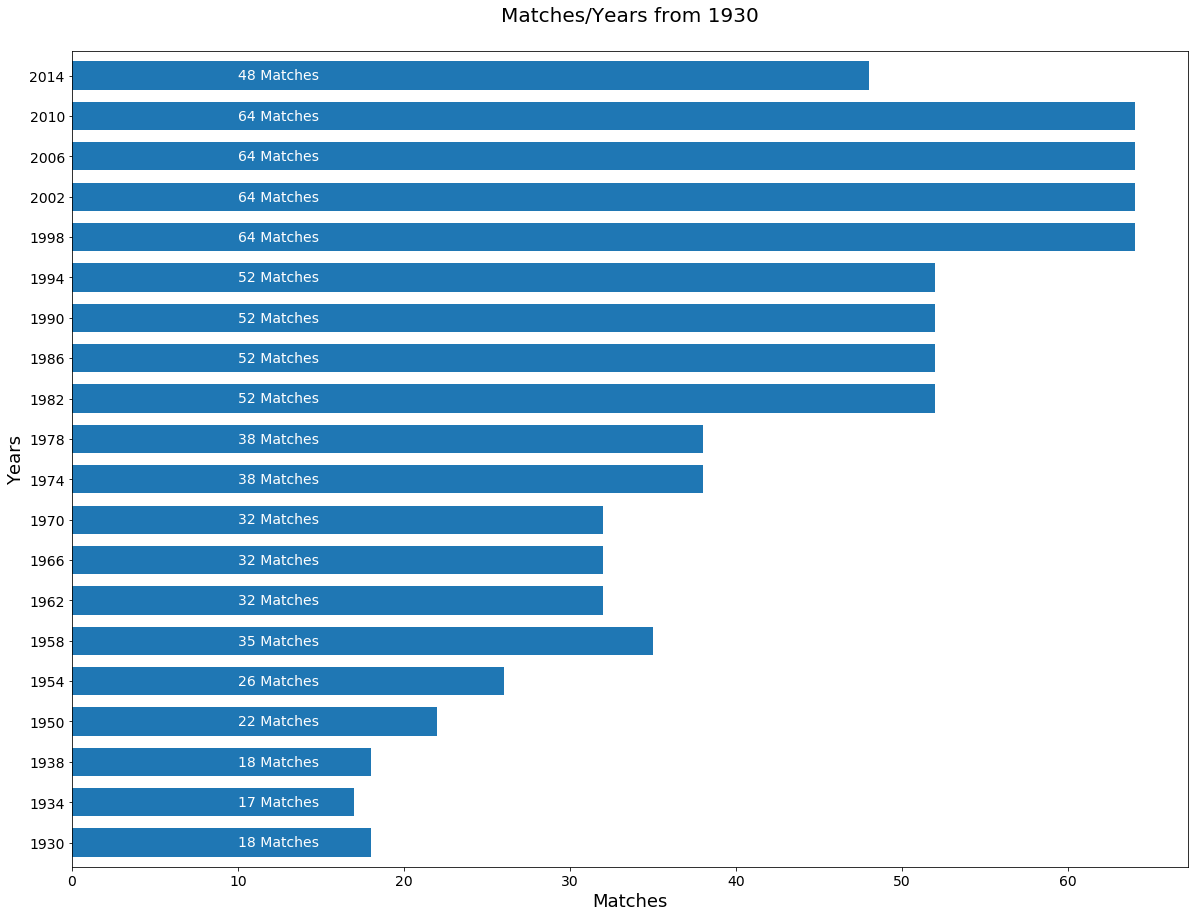

In [61]:
barplot('Years', 'Matches', total_years.keys(), total_years.values())

---
## Total goals scored for each tournament year.
---

In [43]:
df_goals = df[['Year', 'HomeGoals', 'AwayGoals']]
df_goals = df_goals.groupby(by ='Year').sum(axis=0)
df_goals['Total Goals'] = df_goals.sum(axis = 1)

goals = list(df_goals['Total Goals'])
years = list(total_years.keys())

#for i in range(len(goals)):
    #print('In', str(years[i]) + ',', 'a total of',  goals[i], 'goals were scored.', '\n------')

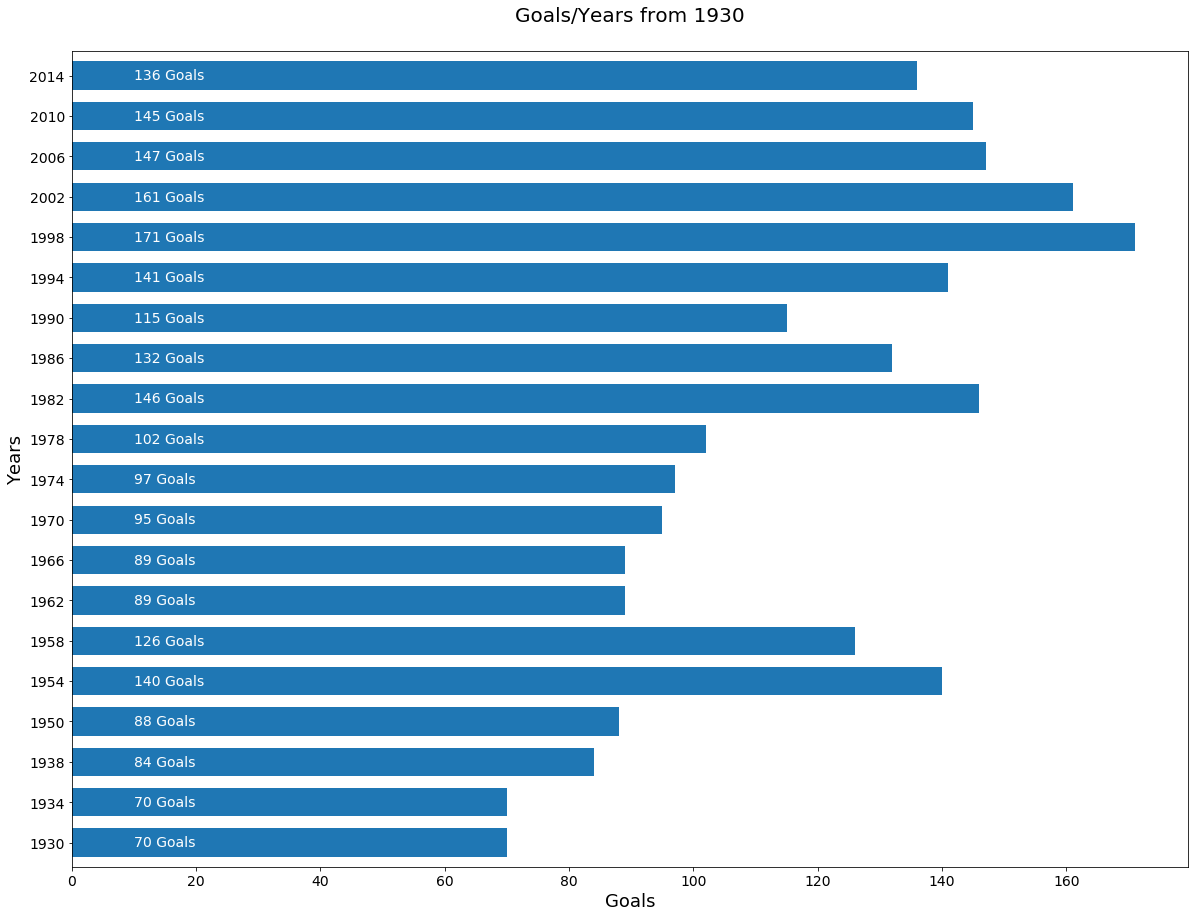

In [62]:
barplot('Years', 'Goals', years, goals)

---
## All teams who have reached finals and how many times.
---

In [45]:
df_finals = df.loc[(df['Round'] == 'Final')]
df_home = df_finals['HomeTeam'].to_list()
df_away = df_finals['AwayTeam'].to_list()

df_final_teams = df_home + df_away
df_final_teams_count = Counter(df_final_teams)


#for k,v in df_final_teams_count.items():
    #if v == 1:
        #print(k, 'have reached the finals', v, 'time.', '\n------')
    #f v > 1:
        #print(k, 'have reached the finals', v, 'times.', '\n------')

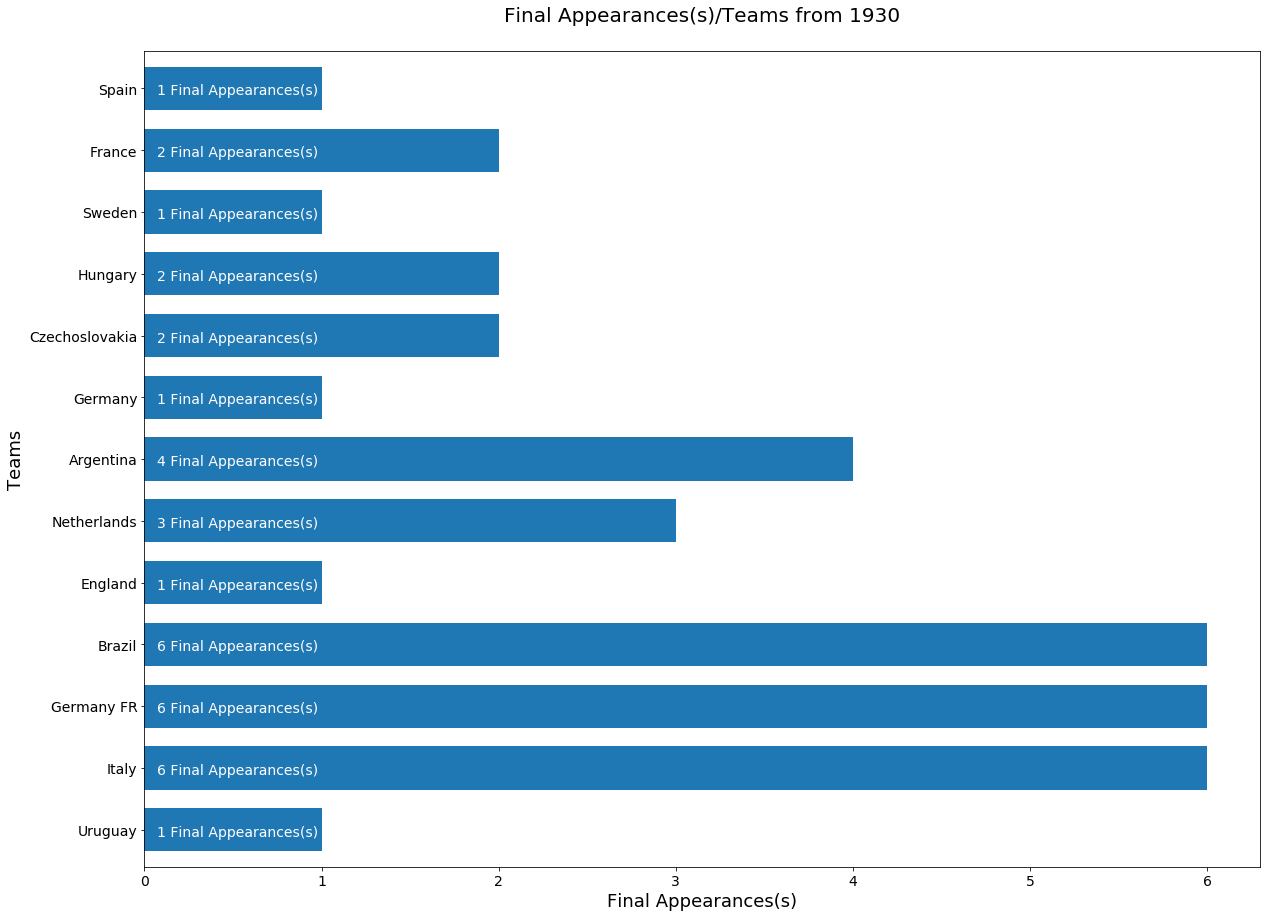

In [183]:
barplot('Teams', "Final Appearances(s)", df_final_teams_count.keys(), df_final_teams_count.values(), 0.07)

---
## All teams who have reached semi-finals and how many times.
---

In [53]:
df_semis = df.loc[(df['Round'] == 'Semi-finals')]
df_shome = df_semis['HomeTeam'].to_list()
df_saway = df_semis['AwayTeam'].to_list()

df_semis_teams = df_shome + df_saway
df_semis_teams_count = Counter(df_semis_teams)

#for k,v in df_semis_teams_count.items():
    #if v == 1:
        #print(k, 'have reached the semi-finals', v, 'time.', '\n------')
    #if v > 1:
        #print(k, 'have reached the semi-finals', v, 'times.', '\n------')

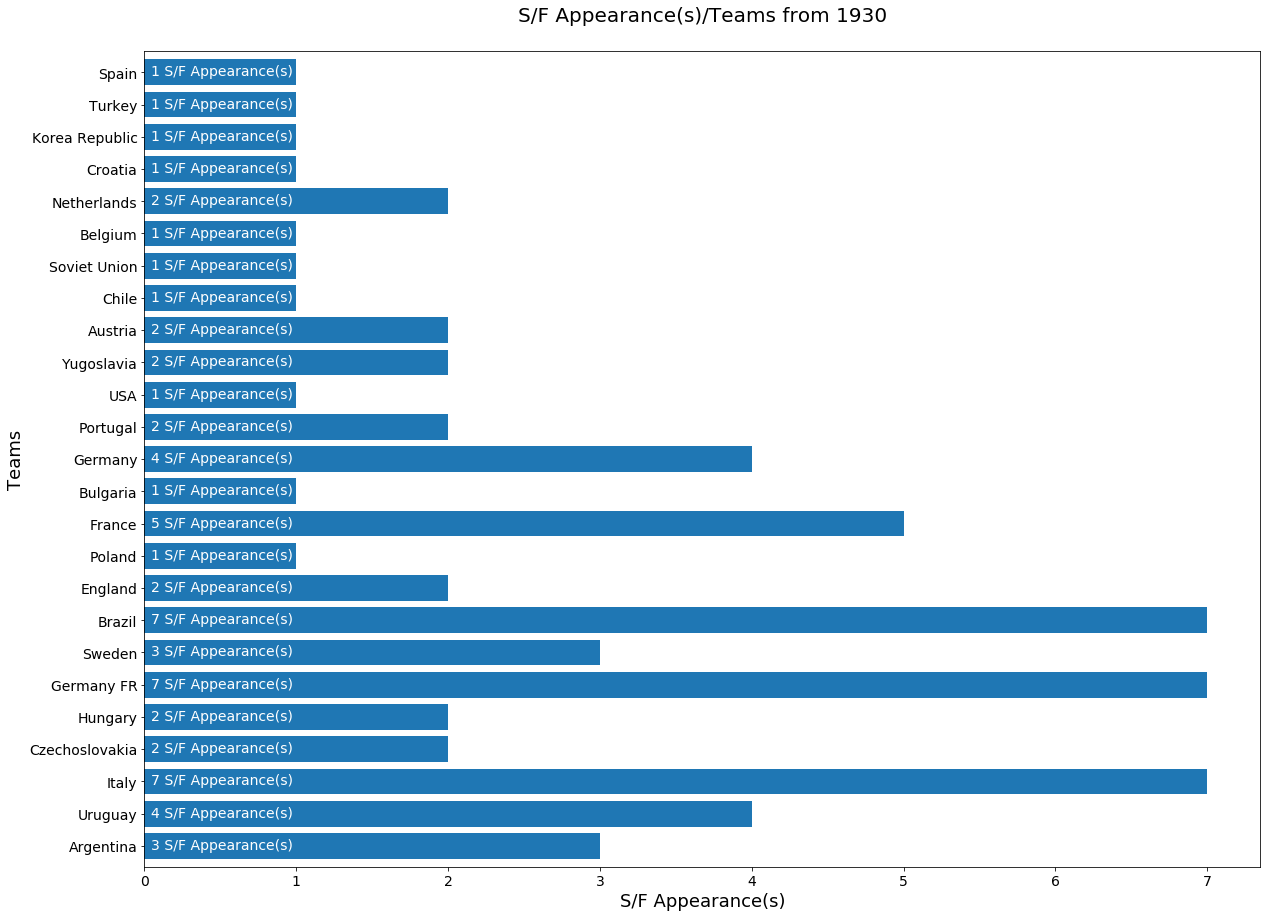

In [186]:
barplot('Teams', "S/F Appearance(s)", df_semis_teams_count.keys(), df_semis_teams_count.values(), 0.04, bar_width = 0.8)

---
## Goals and average goals;
---
1. How many goals and average goals scored in all semi-finals.
2. How many goals and average goals scored in all quarter-finals.
3. How many goals and average number scored in all finals

In [120]:
def goals(round):
    df_round = df.loc[(df['Round'] == round)]
    df_round = df_round[['Year', 'HomeGoals', 'AwayGoals']]
    df_round_goals = df_round.groupby(by ='Year').sum(axis=0)
    df_round_goals['Total Goals'] = df_round_goals[['HomeGoals', 'AwayGoals']].sum(axis =1)
    #print(df_round_goals.head())
    
    totalGames = df_round['Year'].count()
    totalGoals = df_round_goals['Total Goals'].sum()
    #print(totalGoals)
    avgGoals = totalGoals/totalGames
    #print(type(avgGoals))
   
    return totalGoals, avgGoals

In [141]:
avg_goals = {}
total_goals = {}

ko_stages = ['Final', 'Semi-finals', 'Quarter-finals']

for each in ko_stages:
    
    result = goals(each)
    
    average = result[1]
    #print(average)
    
    total = result[0]
    #print(total)
    
    print('Total Goals in', each, ':', result[0], 'goals.')
    print('Average Goals per Game in', each, ':', '{0:.2f}'.format(average), 'goals/game.', '\n------')
    
    avg_goals[each] = round(average, 2)
    total_goals[each] = total

print(total_goals)
print(avg_goals)

Total Goals in Final : 67 goals.
Average Goals per Game in Final : 3.72 goals/game. 
------
Total Goals in Semi-finals : 115 goals.
Average Goals per Game in Semi-finals : 3.59 goals/game. 
------
Total Goals in Quarter-finals : 170 goals.
Average Goals per Game in Quarter-finals : 2.93 goals/game. 
------
{'Final': 67, 'Semi-finals': 115, 'Quarter-finals': 170}
{'Final': 3.72, 'Semi-finals': 3.59, 'Quarter-finals': 2.93}


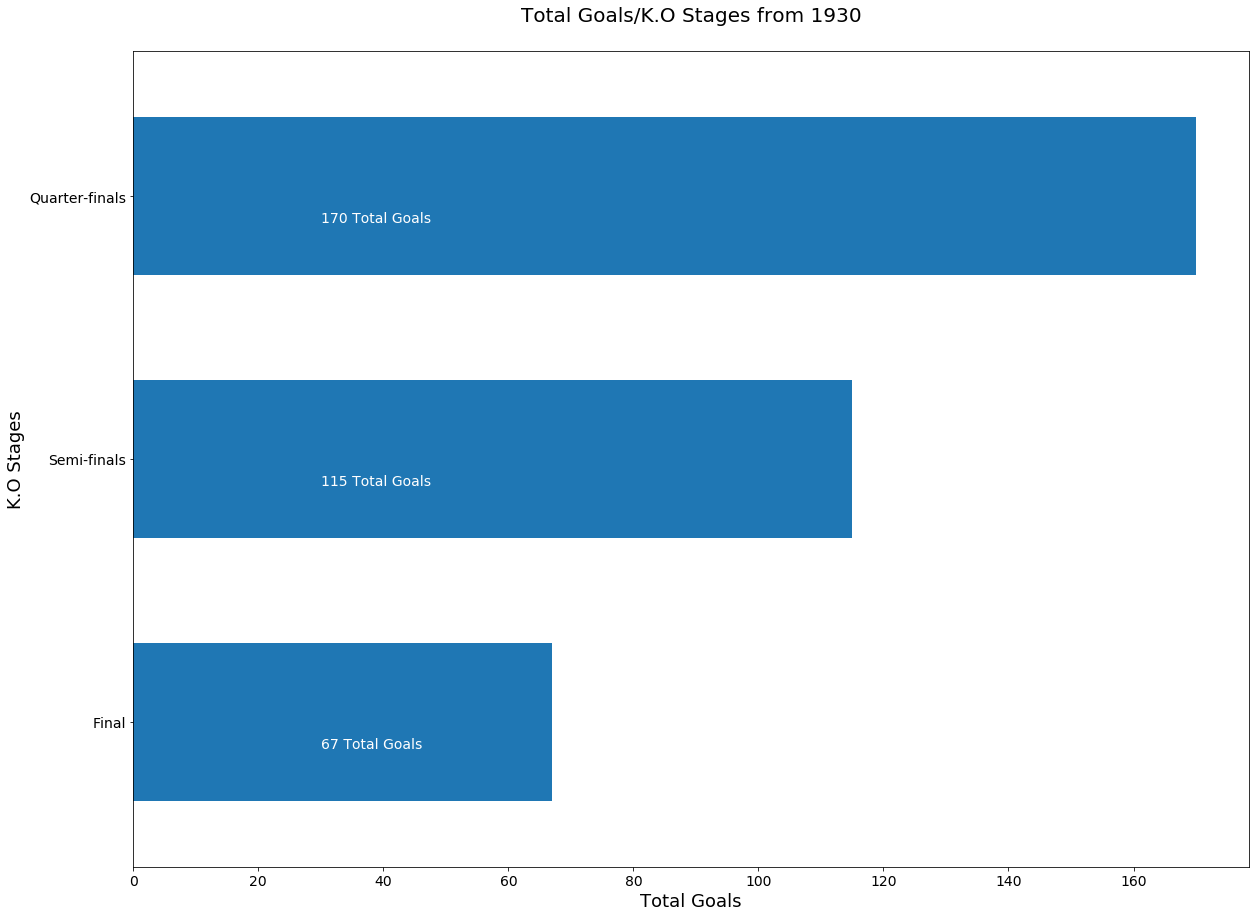

In [156]:
barplot('K.O Stages', 'Total Goals', total_goals.keys(), total_goals.values(), annotate = 30, bar_width = 0.6)

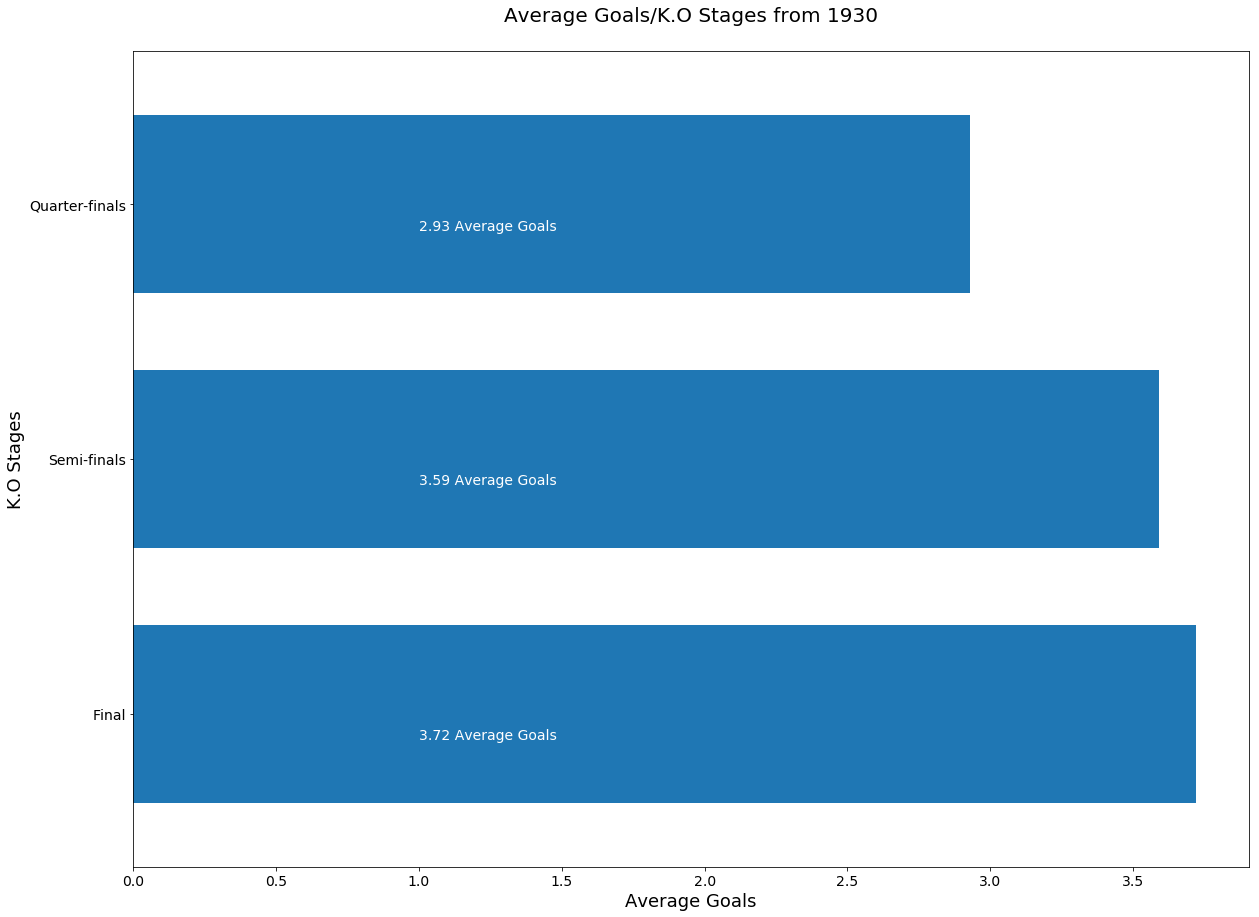

In [155]:
barplot('K.O Stages', 'Average Goals', avg_goals.keys(), avg_goals.values(), annotate = 1, bar_width = 0.7)

---
## How many matches were played outside quarter-finals and above.
---

In [157]:
def stage_games(stages):
    total_games = 0
    for each in stages:
        df_games = df.loc[(df['Round'] == each)].count()
        df_games = df_games['Round']
        total_games += df_games
            
    return total_games

In [158]:
df_stages = set(df['Round'].unique())
quarters = set(['Quarter-finals', 'Semi-finals', 'Final', 'Match for third place', 'Third place' ])
df_stages = list(df_stages - quarters)
#print(df_stages)


games = stage_games(df_stages)
print('Total Number of Games Played Outside Q/F and Above: ' +str(games) + '.')

Total Number of Games Played Outside Q/F and Above: 695.


---
# Kicker
---
Two new columns for each of the outcome of every match stating:
<br>
1. outcome = D for Draw, A for AwayTeam Wins, H for HomeTeam wins.
2. Winner of each game: 'Draw' if no winner.

In [178]:
df_result = df[['Year', 'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam']]
df_result

games = len(df_result)

result = []
outcome = []

for i in range(games):
    
    if df['Observation'].loc[i] != ' ':
        x = df['Observation'].loc[i]
        x = x[:-26]
        
        if df['HomeTeam'].loc[i] == x:
            winner = 'H'
            result.append(winner)
            team = df['HomeTeam'].loc[i]
            outcome.append(team)
        
        else:
            winner = 'A'
            result.append(winner)
            team = df['AwayTeam'].loc[i]
            outcome.append(team) 
    
    if (df['HomeGoals'].loc[i] > df['AwayGoals'].loc[i]):
        winner = 'H'
        result.append(winner)
        team = df['HomeTeam'].loc[i]
        outcome.append(team)
   
        
    elif df['HomeGoals'].loc[i] < df['AwayGoals'].loc[i]:
        winner = 'A'
        result.append(winner)
        team = df['AwayTeam'].loc[i]
        outcome.append(team)
        
    
    elif (df['HomeGoals'].loc[i] == df['AwayGoals'].loc[i]) and (df['AwayGoals'].loc[i]) == 0:
        winner = 'D'
        result.append(winner)
        outcome.append('Draw')      
    
    
    elif (df['HomeGoals'].loc[i] == df['AwayGoals'].loc[i]) and (df['AwayGoals'].loc[i])> 0:
        winner = 'A' #AwayGoalsRule
        result.append(winner)
        team = df['AwayTeam'].loc[i]
        outcome.append(team)     
        

#print(result)
#print(outcome)
df['Outcome'] = pd.DataFrame(result)
df['Winner'] = pd.DataFrame(outcome)

# Final Table With Kicker

In [180]:
df.loc[697:720,]

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,Outcome,Winner
697,2006,26-Jun-06,21:00,Round of 16,"FIFA World Cup Stadium, Cologne",Cologne,Switzerland,0,0,Ukraine,Ukraine win on penalties (0 - 3),A,Ukraine
698,2006,27-Jun-06,17:00,Round of 16,"FIFA World Cup Stadium, Dortmund",Dortmund,Brazil,3,0,Ghana,,H,Brazil
699,2006,27-Jun-06,21:00,Round of 16,"FIFA World Cup Stadium, Hanover",Hanover,Spain,1,3,France,,A,France
700,2006,30-Jun-06,17:00,Quarter-finals,Olympiastadion,Berlin,Germany,1,1,Argentina,Germany win on penalties (4 - 2),H,Germany
701,2006,30-Jun-06,21:00,Quarter-finals,"FIFA World Cup Stadium, Hamburg",Hamburg,Italy,3,0,Ukraine,,H,Italy
702,2006,1-Jul-06,17:00,Quarter-finals,"FIFA World Cup Stadium, Gelsenkirchen",Gelsenkirchen,England,0,0,Portugal,Portugal win on penalties (1 - 3),A,Portugal
703,2006,1-Jul-06,21:00,Quarter-finals,"FIFA World Cup Stadium, Frankfurt",Frankfurt/Main,Brazil,0,1,France,,A,France
704,2006,4-Jul-06,21:00,Semi-finals,"FIFA World Cup Stadium, Dortmund",Dortmund,Germany,0,2,Italy,Italy win after extra time,A,Italy
705,2006,5-Jul-06,21:00,Semi-finals,"FIFA World Cup Stadium, Munich",Munich,Portugal,0,1,France,,A,France
706,2006,8-Jul-06,21:00,Third place,Gottlieb-Daimler-Stadion,Stuttgart,Germany,3,1,Portugal,,H,Germany


In [179]:
df.loc[df['HomeGoals'] == df['AwayGoals']]

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,Outcome,Winner
28,1934,31-May-34,16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,1,Spain,,A,Spain
35,1938,4-Jun-38,17:00,First round,Parc des Princes,Paris,Switzerland,1,1,Germany,,A,Germany
38,1938,5-Jun-38,17:00,First round,Stade Municipal,Toulouse,Cuba,3,3,Romania,,A,Romania
44,1938,12-Jun-38,17:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,1,1,Czechoslovakia,,A,Czechoslovakia
58,1950,28-Jun-50,15:00,Group 1,Pacaembu,Sao Paulo,Brazil,2,2,Switzerland,,A,Switzerland
61,1950,29-Jun-50,15:30,Group 3,Durival de Brito,Curitiba,Sweden,2,2,Paraguay,,A,Paraguay
69,1950,9-Jul-50,15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,2,2,Spain,,A,Spain
81,1954,17-Jun-54,18:10,Group 4,St. Jakob,Basel,England,4,4,Belgium,,A,Belgium
86,1954,19-Jun-54,17:00,Group 1,La Pontaise,Lausanne,Brazil,1,1,Yugoslavia,,A,Yugoslavia
102,1958,8-Jun-58,19:00,Group 4,Nya Ullevi,Gothenburg,Soviet Union,2,2,England,,A,England


In [37]:
# The code was removed by Watson Studio for sharing.

In [38]:
project.save_data(file_name = "Final Fifa Datafram.csv", data = df.to_csv(index=False))

{'file_name': 'Final Fifa Datafram.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'dsdatavisualizationproject-donotdelete-pr-9obdr6no6ukmce',
 'asset_id': '82cee171-d961-4119-93ca-ea10a400d479'}